# Importing Dependencies

In [924]:
import pymongo
from pprint import pprint
from bson.objectid import ObjectId
import string
import operator
import re
print (pymongo.version)

4.3.3


In [925]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establishing connection and retrieving data from MongoDB

## Connecting to the MongoDB

In [926]:
url = 'mongodb://localhost:27017/'
print (url)
myclient = pymongo.MongoClient(url)
print(myclient)

mongodb://localhost:27017/
MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


## Connecting to database

In [927]:
''' Database BIGDATACOURSEWORK will be connected next '''

mydb = myclient['BIGDATACOURSEWORK']
print (mydb)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'BIGDATACOURSEWORK')


In [928]:
mydb

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'BIGDATACOURSEWORK')

## Retrieving all documents from the necessary collection

In [929]:
mydb.list_collection_names()

['New York City Airbnb Listings File']

<b> This collection contains more than 40,000 documents that contain information about NYC's Airbnb rentals

<b> database.collection.find() will return all available documents in that corresponding collection. 

In [930]:
collection = mydb['New York City Airbnb Listings File'].find()

In [931]:
collection

<b> I will convert the collection to a list and pass it to a pandas DataFrame object to load all of our documents in pandas dataframe

In [932]:
df = pd.DataFrame(list(collection))

# Basic information about the data

In [933]:
df.head()

,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bedrooms,license
0,6421707d8031041829152526,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,...,4.81,4.4,f,3,3,0,0,0.31,NaN,NaN
1,6421707d8031041829152527,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,...,4.94,4.92,f,1,0,1,0,0.73,1,NaN
2,6421707d8031041829152528,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,4.67,5.0,f,1,1,0,0,0.03,2,NaN
3,6421707d8031041829152529,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,...,4.47,4.52,f,2,0,2,0,0.30,1,NaN
4,6421707d803104182915252a,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,...,4.67,4.56,f,1,1,0,0,1.13,NaN,NaN


In [934]:
df.shape

(41533, 74)

<b> There are 41533 rows and 74 columns in our data.

In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   _id                                           41533 non-null  object
 1   id                                            41533 non-null  object
 2   listing_url                                   41533 non-null  object
 3   scrape_id                                     41533 non-null  object
 4   last_scraped                                  41533 non-null  object
 5   source                                        41533 non-null  object
 6   name                                          41522 non-null  object
 7   description                                   40748 non-null  object
 8   neighborhood_overview                         24090 non-null  object
 9   picture_url                                   41533 non-null  object
 10

In [936]:
nulls = dict(df.isnull().sum() / df.shape[0] * 100)

In [937]:
nulls =  {k: v for k, v in sorted(nulls.items(), reverse = True, key=lambda item: item[1])}

In [938]:
def is_not_zero(pair):
    key, value = pair

    if value > 0:
        return True
    else:
        return False

nulls = dict(filter(is_not_zero, nulls.items()))

In [939]:
keys = list(nulls.keys())
values = list(nulls.values())

Text(0.08, 0.5, '% of Null Values')

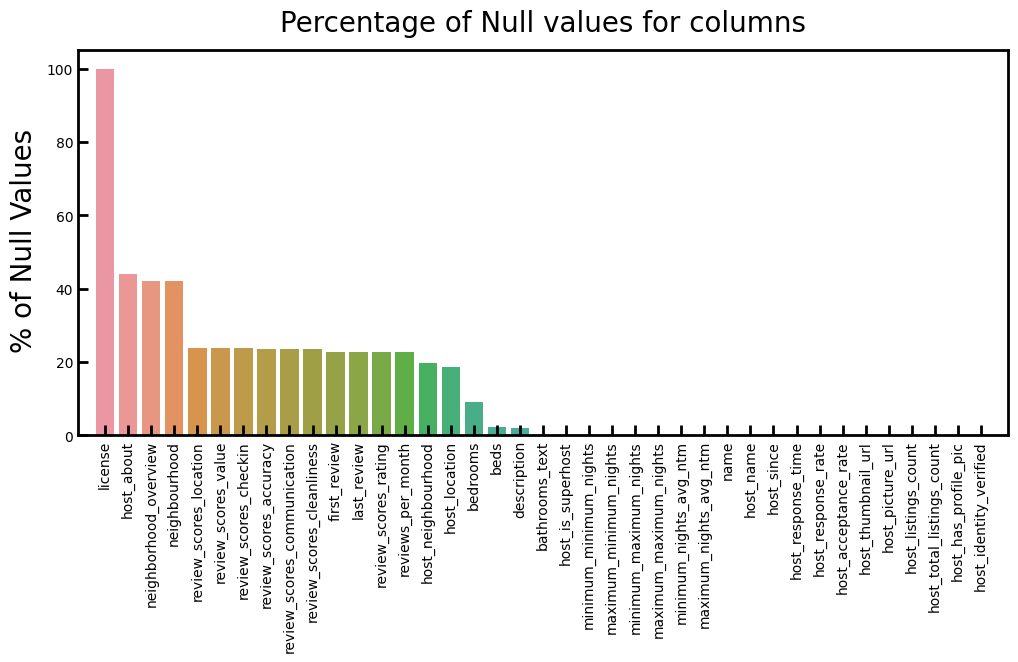

In [940]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = keys, y = values, ax = ax)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.text(0.5, 1.05, 'Percentage of Null values for columns',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

# fig.text(0.5, -0.35, 'Columns', ha='center', va='center', fontsize = 20)
fig.text(0.08, 0.5, '% of Null Values', ha='center', va='center', rotation='vertical', fontsize = 20)

# plt.savefig('percentage_of_null_values.jpg',  bbox_inches='tight', dpi = 500)

It looks like we have two choices for columns with more than 30 % null values. 
    
    1. Either drop them, or
    2. Figure out a way to properly fill those null values

In [941]:
available_columns = df.columns;available_columns

Index(['_id', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       '

In [942]:
columns_that_are_dropped = []

In [943]:
data_dictionary = { 
    'id': 'The unique identifier of the Airbnb listing.',
    'listing_url': 'The URL of the Airbnb listing page.',
    'scrape_id': 'The unique identifier of the data scrape used to generate the Airbnb listing data.',
    'last_scraped': 'The date on which the Airbnb listing data was last scraped.', 
    'name': 'The name or title of the Airbnb listing.',
    'summary': 'A short summary of the Airbnb listing.',
    'space': 'A description of the space available in the Airbnb listing.',
    'description': 'A detailed description of the Airbnb listing.', 
    'experiences_offered' : 'A list of experiences offered by the Airbnb host.',
    'neighborhood_overview': 'An overview of the neighbourhood where the Airbnb listing is located.',
    'notes': 'Additional notes or information about the Airbnb listing.',
    'transit': 'Information about nearby public transportation options.',
    'access': 'Information about what areas of the Airbnb listing are accessible to guests.',
    'interaction': 'Information about how the Airbnb host will interact with guests.',
    'house_rules': 'Rules and policies set by the Airbnb host for guests.',
    'thumbnail_url': 'The URL of the Airbnb listing thumbnail image.',
    'medium_url': 'The URL of a medium-sized image of the Airbnb listing.',
    'picture_url': 'The URL of the main image of the Airbnb listing.',
    'xl_picture_url': 'The URL of an extra-large image of the Airbnb listing.',
    'host_id': 'The unique identifier of the Airbnb host who owns the listing.',
    'host_url': 'The URL of the Airbnb host page.',
    'host_name': 'The name of the Airbnb host who owns the listing.',
    'host_since': 'The date on which the Airbnb host joined the platform.',
    'host_location': 'The location of the Airbnb host.',
    'host_about': 'Information about the Airbnb host.',
    'host_response_time': 'The typical amount of time it takes for the Airbnb host to respond to messages.',
    'host_response_rate': 'The percentage of messages that the Airbnb host responds to.',
    'host_acceptance_rate': 'The percentage of booking requests that the Airbnb host accepts.',
    'host_is_superhost': 'A binary value indicating whether or not the Airbnb host is a Superhost.',
    'host_thumbnail_url': 'The URL of the Airbnb host\'s thumbnail image.', 
    'host_picture_url': 'The URL of the Airbnb host\'s main image.',
    'host_neighbourhood': 'The neighbourhood where the Airbnb host lives.',
    'host_listings_count': 'The number of listings that the Airbnb host has on the platform.',
    'host_total_listings_count': 'The total number of listings that the Airbnb host has on all platforms.',
    'host_verifications': 'A list of verification methods used by the Airbnb host.',
    'host_has_profile_pic': 'A binary value indicating whether or not the Airbnb host has a profile picture.',
    'host_identity_verified': 'A binary value indicating whether or not the Airbnb host\'s identity has been verified.',
    'neighbourhood': 'The neighbourhood where the Airbnb listing is located.',
    'neighbourhood_cleansed': 'The cleaned-up version of the neighbourhood name.',
    'neighbourhood_group_cleansed': 'The cleaned-up version of the neighbourhood group name.',
    'latitude': 'The latitude coordinate of the Airbnb listing.',
    'longitude': 'The longitude coordinate of the Airbnb listing.',
    'property_type': 'The type of property being listed on Airbnb (e.g. Apartment, House, etc.).',
    'room_type': 'The type of room being listed on Airbnb (e.g. Private room, Entire home/apt, etc.).',
    'accommodates': 'The maximum number of guests the Airbnb listing can accommodate.',
    'bathrooms': 'The number of bathrooms available in the Airbnb listing.',
    'bedrooms': 'The number of bedrooms available in the Airbnb listing.',
    'beds': 'The number of beds available in the Airbnb listing.',
    'bed_type': 'The type of bed available in the Airbnb listing (e.g. Real Bed, Futon, etc.).',
    'amenities': 'A list of amenities available in the Airbnb listing (e.g. Wifi, TV, etc.).',
    'square_feet': 'The size of the Airbnb listing in square feet.',
    'price': 'The nightly price of the Airbnb listing.',
    'weekly_price': 'The weekly price of the Airbnb listing.',
    'monthly_price': 'The monthly price of the Airbnb listing.',
    'security_deposit': 'The amount of security deposit required for the Airbnb listing.',
    'cleaning_fee': 'The cleaning fee charged for the Airbnb listing.',
    'guests_included': 'The number of guests included in the nightly price of the Airbnb listing.',
    'extra_people': 'The additional cost per guest after the number of guests included in the nightly price.',
    'minimum_nights': 'The minimum number of nights required to book the Airbnb listing.',
    'maximum_nights': 'The maximum number of nights allowed for a booking of the Airbnb listing.',
    'calendar_updated': 'The last time the Airbnb listing calendar was updated.',
    'has_availability': 'A binary value indicating whether or not the Airbnb listing is currently available.',
    'availability_30': 'The number of available nights in the next 30 days.',
    'availability_60': 'The number of available nights in the next 60 days.',
    'availability_90': 'The number of available nights in the next 90 days.',
    'availability_365': 'The number of available nights in the next 365 days.',
    'calendar_last_scraped': 'The date on which the Airbnb listing calendar was last scraped.',
    'number_of_reviews': 'The total number of reviews for the Airbnb listing.',
    'number_of_reviews_ltm': 'The total number of reviews for the Airbnb listing in the last 12 months.',
    'first_review': 'The date of the first review for the Airbnb listing.',
    'last_review': 'The date of the most recent review for the Airbnb listing.',
    'review_scores_rating': 'The average rating score for the Airbnb listing.',
    'review_scores_accuracy': 'The average accuracy score for the Airbnb listing.',
    'review_scores_cleanliness': 'The average cleanliness score for the Airbnb listing.',
    'review_scores_communication': 'The average communication score for the Airbnb listing.',
}

In [944]:
# pd.DataFrame(data_dictionary.values(), 
# columns = data_dictionary.keys())

# Data Cleaning

In [945]:
def check_column_presence(column):
    try:
        if df[column].shape[0] > 0:
            return 'Column |{}| is Present'.format(column)
        else:
            return None
    except:
        return "Column |{}| has been removed !! ".format(column)

In [946]:
# testing the function
check_column_presence('availability_365')

'Column |availability_365| is Present'

In [947]:
df['amenities']

0        ["Carbon monoxide alarm", "Stove", "Bathtub", ...
1        ["Hair dryer", "Smoke alarm", "Carbon monoxide...
2        ["HDTV with Disney+, HBO Max, standard cable, ...
3        ["Heating", "Wifi", "Long term stays allowed",...
4        ["Carbon monoxide alarm", "Shampoo", "Stove", ...
                               ...                        
41528    ["Smoke alarm", "Wifi", "Exercise equipment", ...
41529    ["Smoke alarm", "First aid kit", "Wifi", "TV",...
41530    ["Hair dryer", "Smoke alarm", "Carbon monoxide...
41531    ["Smoke alarm", "Carbon monoxide alarm", "Firs...
41532    ["Carbon monoxide alarm", "Shampoo", "Conditio...
Name: amenities, Length: 41533, dtype: object

## Dropping useless individual columns

### 1. `_id` column

In [948]:
df['_id'].unique().shape

(41533,)

This column is simply generated by Mongodb by assignng a unique value to each document/rows while uploading the file.
We don't need this column, which is why we will proceed to drop this column.

In [949]:
df.drop('_id', axis = 1, inplace = True)

In [950]:
check_column_presence('_id')

'Column |_id| has been removed !! '

In [951]:
columns_that_are_dropped.append('_id')

### 2. `id` column

In [952]:
df['id'].shape

(41533,)

Each rental is assigned a unique ID. So, this column is also not necessary.

In [953]:
df.drop('id', axis = 1, inplace = True)

In [954]:
check_column_presence('id')

'Column |id| has been removed !! '

In [955]:
columns_that_are_dropped.append('id')

### 3. `listing_url` column

In [956]:
df['listing_url'].unique().shape

(41533,)

Likewise, this column contains the listing URL for the corresponding rentals. We can remove this column as it does not contain any useful information.

In [957]:
df.drop('listing_url', axis = 1, inplace = True)

In [958]:
check_column_presence('listing_url')

'Column |listing_url| has been removed !! '

In [959]:
columns_that_are_dropped.append('listing_url')

### 4. `scrape_id` column

In [960]:
df['scrape_id'].unique().shape

(1,)

In [961]:
df['scrape_id'].unique()

array(['20221204162430'], dtype=object)

This column has only one unique value which is why we will proceed to remove this column as well. 

In [962]:
df.drop('scrape_id', axis = 1, inplace = True)

In [963]:
check_column_presence('scrape_id')

'Column |scrape_id| has been removed !! '

In [964]:
columns_that_are_dropped.append('scrape_id')

### 5. `last_scraped` column

In [965]:
df['last_scraped'].unique()

array(['2022-12-05', '2022-12-04'], dtype=object)

It looks like Airbnb scraped all of their data from database at the end of 2022, which is why two date values belonging to december are only present in this column. So, we can safely drop this column as well.

In [966]:
df.drop('last_scraped', axis = 1, inplace = True)

In [967]:
check_column_presence('last_scraped')

'Column |last_scraped| has been removed !! '

In [968]:
columns_that_are_dropped.append('last_scraped')

### 6. `source` column

In [969]:
available_columns[5]

'source'

In [970]:
df['source'].unique()

array(['city scrape', 'previous scrape'], dtype=object)

This column contains the source from where Airbnb retrieved their data. So, we can remove this column. 

In [971]:
df.drop('source', axis = 1, inplace = True)
check_column_presence('source')

'Column |source| has been removed !! '

In [972]:
columns_that_are_dropped.append('source')

### 7. `name` column

In [973]:
available_columns[6]

'name'

In [974]:
df['name']

0                           Skylit Midtown Castle
1              Cozy Clean Guest Room - Family Apt
2        Spacious Brooklyn Duplex, Patio + Garden
3                                 BlissArtsSpace!
4                Only 2 stops to Manhattan studio
                           ...                   
41528                                     Dahiari
41529                          Beautiful Basement
41530                  Central Park Close By - 24
41531                     Good Vibes at The Bronx
41532           2 bedroom Condo near West Village
Name: name, Length: 41533, dtype: object

This column contains names of each Airbnb rentals

In [975]:
df['name'].sample(10).values

array(['Downtown Brooklyn', 'Upper East Side Large 2 Bedroom',
       'Top Floor Brownstone Studio one block to Subway',
       'Private studio room - Brownstone - Brooklyn',
       'Quiet room in Bushwick Apartment above Jefferson L',
       'The Melo Place', 'A room in historic BedStuy',
       '2 Bedrooms Apartment with Balcony by Central Park',
       'Spacious private duplex in Central Manhattan',
       'Private lovely bedroom in 1 Bedroom apartment'], dtype=object)

some of the names of the Airbnb rentals contain the location of the rentals. Since we have other columns precisely providing the location of the rentals, we can proceed to safely remove this column.

In [976]:
df.drop('name', axis = 1, inplace = True)
check_column_presence('name')

'Column |name| has been removed !! '

In [977]:
columns_that_are_dropped.append('name')

### 8. `description` column

In [978]:
available_columns[7]

'description'

In [979]:
df['description']

0        Beautiful, spacious skylit studio in the heart...
1        Our best guests are seeking a safe, clean, spa...
2        We welcome you to stay in our lovely 2 br dupl...
3        One room available for rent in a 2 bedroom apt...
4        Comfortable studio apartment with super comfor...
                               ...                        
41528    Desconecta de tus preocupaciones en este espac...
41529    Your family will be close to everything when y...
41530    This is a Three-Bedroom Apartment. You will ha...
41531    Keep it simple at this peaceful and centrally-...
41532    This beautifully decorated condo will give you...
Name: description, Length: 41533, dtype: object

This column is also useless for analysis as it contains description of each Airbnb rentals.

In [980]:
df.drop('description', axis = 1, inplace = True)
check_column_presence('description')

'Column |description| has been removed !! '

In [981]:
columns_that_are_dropped.append('description')

### 9. `neighborhood_overview` column

In [982]:
available_columns[8]

'neighborhood_overview'

In [983]:
df['neighborhood_overview'].isnull().sum()

17443

In [984]:
df['neighborhood_overview'].dropna()

0        Centrally located in the heart of Manhattan ju...
1        Our neighborhood is full of restaurants and ca...
5          Theater district, many restaurants around here.
6        Location: Five minutes to Central Park, Museum...
7        This sweet Harlem sanctuary is a 10-20 minute ...
                               ...                        
41493    Woodlawn Heights is a fun and safe community. ...
41497    ▶What's nearby <br />• In Manhattan <br />• Ti...
41521    Prime Flatiron / Nomad location in middle of M...
41523    This busy convenient location provides quick a...
41525    The Most BEAUTIFUL NYC Skyline View From The C...
Name: neighborhood_overview, Length: 24090, dtype: object

We won't need this column as well as we already have columns containing neighbourhood information. 

In [985]:
df.drop('neighborhood_overview', axis = 1, inplace = True)
check_column_presence('neighborhood_overview')

'Column |neighborhood_overview| has been removed !! '

In [986]:
columns_that_are_dropped.append('neighborhood_overview')

### 10. `host_id` column

In [987]:
available_columns[10]

'host_id'

In [988]:
df['host_id']

0             2845
1             7490
2             7378
3             7356
4            15991
           ...    
41528    125534010
41529    338424773
41530      2653479
41531    421264574
41532    481177884
Name: host_id, Length: 41533, dtype: object

Each Airbnb rental's host will have unique host id. So, we can proceed to drop this column as well.

In [989]:
df.drop('host_id', axis = 1, inplace = True)
check_column_presence('host_id')
columns_that_are_dropped.append('host_id')

### 11. `host_url` column

In [990]:
available_columns[11]

'host_url'

In [991]:
df['host_url']

0             https://www.airbnb.com/users/show/2845
1             https://www.airbnb.com/users/show/7490
2             https://www.airbnb.com/users/show/7378
3             https://www.airbnb.com/users/show/7356
4            https://www.airbnb.com/users/show/15991
                            ...                     
41528    https://www.airbnb.com/users/show/125534010
41529    https://www.airbnb.com/users/show/338424773
41530      https://www.airbnb.com/users/show/2653479
41531    https://www.airbnb.com/users/show/421264574
41532    https://www.airbnb.com/users/show/481177884
Name: host_url, Length: 41533, dtype: object

This column contains the URL of each Airbnb's hosts' profiles. So, we can safely drop this column as it will be of no further use to us.

In [992]:
df.drop('host_url', axis = 1, inplace = True)
check_column_presence('host_url')
columns_that_are_dropped.append('host_url')

### 12. `host_name` column

In [993]:
available_columns[12]

'host_name'

In [994]:
df['host_name']

0             Jennifer
1            MaryEllen
2              Rebecca
3                Garon
4        Allen & Irina
             ...      
41528          Larissa
41529               Md
41530          Richard
41531           Aridio
41532           Steven
Name: host_name, Length: 41533, dtype: object

In [995]:
df['host_name'].unique().shape

(9629,)

Each Airbnb rental's host will have a name. Therefore, this column will not be of much use to us.

In [996]:
df.drop('host_name', axis = 1, inplace = True)
check_column_presence('host_name')
columns_that_are_dropped.append('host_name')

### 13. `host_since` column

In [997]:
available_columns[13]

'host_since'

In [998]:
df['host_since']

0        2008-09-09
1        2009-02-05
2        2009-02-03
3        2009-02-03
4        2009-05-06
            ...    
41528    2017-04-12
41529    2020-02-24
41530    2012-06-16
41531    2021-09-02
41532    2022-09-26
Name: host_since, Length: 41533, dtype: object

This column contains information about the date since when the Airbnb rental has been opened up for hosting services.

In [999]:
df['host_since'] = pd.to_datetime(df['host_since'])

<b> Since we will be predicting the rental's price, we would be focusing more on the properties of individual rental. So, date from which a rental has been open should not matter much in predicting price. 

In [1000]:
df['host_since'].isnull().sum()

5

In [1001]:
available_columns[13]

'host_since'

In [1002]:
df.drop('host_since', axis = 1, inplace = True)
check_column_presence('host_since')
columns_that_are_dropped.append('host_since')

### 14. `host_about` column

In [1003]:
available_columns[15]

'host_about'

In [1004]:
df['host_about']

0        A New Yorker since (Phone number hidden by Air...
1        Welcome to family life with my oldest two away...
2        Rebecca is an artist/designer, and Henoch is i...
3         I am an artist(painter, filmmaker) and curato...
4        We love to travel. When we travel we like to s...
                               ...                        
41528                                                  NaN
41529                                                  NaN
41530                   I love to travel and meet people. 
41531                                                  NaN
41532                                                  NaN
Name: host_about, Length: 41533, dtype: object

In [1005]:
df['host_about'].sample(5)

29897    I spent three years traveling around the world...
13560    Hello!\n\nMy residence is near Canarsie Pier. ...
12416                                                  NaN
24676                                                  NaN
5371                                                   NaN
Name: host_about, dtype: object

In [1006]:
df['host_about'].isnull().sum()

18297

This column doesn't contain any useful information. So, we will proceed to drop this columns.

In [1007]:
df.drop('host_about', axis = 1, inplace = True)
check_column_presence('host_about')
columns_that_are_dropped.append('host_about')

In [1008]:
len(columns_that_are_dropped)

14

### 15. `host_location` column

In [1009]:
available_columns[14]

'host_location'

In [1010]:
df['host_location']

0              New York, NY
1              New York, NY
2              New York, NY
3              New York, NY
4              New York, NY
                ...        
41528    Dominican Republic
41529                   NaN
41530          New York, NY
41531                   NaN
41532                   NaN
Name: host_location, Length: 41533, dtype: object

In [1011]:
df['host_location'].isnull().sum()

7745

It looks like this column contains information about the location of the Airbnb's rental's hosts' locations. Furthermore, a foreigner can also host a rental through Airbnb. But, the price of a Airbnb rental should not matter at all as we are predicting price of a rental in NYC and not in other countries. Nonetheless, lets check the number of rentals foreign residents own in NYC.   

In [1012]:
host_location = df['host_location'].dropna()
host_location = host_location.apply(lambda x : x.split(",")[-1])
host_location = host_location.value_counts()

In [1013]:
host_location

 NY                    25682
 United States          4348
 CA                      624
 FL                      395
United States            326
                       ...  
U.S. Virgin Islands        1
 Czechia                   1
 Iceland                   1
India                      1
Dominican Republic         1
Name: host_location, Length: 151, dtype: int64

It looks like residents of different US states and countries own a NYC Airbnb rentals. Lets proceed to sum up all observations for states and United states from the above series to get the total count of all residents in the US owning a NYC Airbnb rentals.

In [1014]:
host_location = dict(host_location)

In [1015]:
total_individual_countries_count = {}

In [1016]:
count = 0
for key, val in host_location.items():   
    if len(key) == 3 or key in ['United States', ' United States']:
        # print(key)
        count += val
        
total_individual_countries_count['USA'] = count

In [1017]:
for key, val in host_location.items():
    if len(key) != 3 and key not in ['United States', ' United States']:
        # print(key)
        total_individual_countries_count[key] = val

In [1018]:
total_individual_countries_count = dict(sorted(total_individual_countries_count.items(), reverse = True,key=lambda item: item[1]))

In [1019]:
total_individual_countries_count

{'USA': 32798,
 ' France': 145,
 ' United Kingdom': 129,
 ' Canada': 77,
 ' Germany': 50,
 ' Australia': 43,
 ' Spain': 36,
 ' Italy': 35,
 ' Brazil': 32,
 ' Israel': 25,
 ' Colombia': 24,
 ' Mexico': 24,
 ' China': 21,
 ' India': 20,
 ' Switzerland': 17,
 'Hong Kong': 15,
 ' Sweden': 12,
 ' Dominican Republic': 11,
 ' Ireland': 11,
 ' New Zealand': 11,
 ' Argentina': 9,
 ' South Korea': 9,
 ' Netherlands': 8,
 ' Puerto Rico': 8,
 ' Belgium': 8,
 'Singapore': 7,
 ' Turkey': 7,
 ' Portugal': 7,
 ' Lebanon': 7,
 ' Denmark': 7,
 ' Japan': 7,
 ' Hungary': 6,
 'China': 6,
 'Israel': 6,
 ' Russia': 6,
 ' Ecuador': 6,
 ' Austria': 6,
 ' Greece': 6,
 ' United Arab Emirates': 5,
 ' Costa Rica': 5,
 'France': 4,
 ' Poland': 4,
 ' Jamaica': 4,
 ' Uruguay': 4,
 'Jamaica': 3,
 'Colombia': 3,
 'Mexico': 3,
 ' Nigeria': 3,
 ' Bulgaria': 3,
 ' Curaçao': 3,
 ' Latvia': 3,
 ' Kazakhstan': 3,
 ' Norway': 3,
 'United Kingdom': 3,
 ' Chile': 3,
 ' Taiwan': 3,
 ' South Africa': 3,
 ' Finland': 3,
 ' Thailan

In [1020]:
df.drop('host_location', axis = 1, inplace = True)
check_column_presence('host_location')
columns_that_are_dropped.append('host_location')

In [1021]:
# available_host_countries = df['host_location'].apply(lambda x : x.split(',')[-1])

### 16. `host_response_time` column

In [1022]:
available_columns[16]

'host_response_time'

In [1023]:
df['host_response_time']

0              within a day
1                       N/A
2                       N/A
3              within a day
4            within an hour
                ...        
41528        within an hour
41529    within a few hours
41530        within an hour
41531                   N/A
41532    within a few hours
Name: host_response_time, Length: 41533, dtype: object

In [1024]:
df['host_response_time'].isnull().sum()

5

Since there are only 5 null values, there should not be much problem filling these values.

In [1025]:
df['host_response_time'].value_counts()

within an hour        18063
N/A                   13640
within a few hours     5997
within a day           3201
a few days or more      627
Name: host_response_time, dtype: int64

Majority of Airbnb hosts seem to respond within an hour. This column will be useful. Additionally, I will change the N/A values to unknown. I will also fill null values as unknown respectively.

In [1026]:
df['host_response_time'] = df['host_response_time'].replace(to_replace = 'N/A', value = 'Unknown')

In [1027]:
df['host_response_time'] = df['host_response_time'].fillna('Unknown')

In [1028]:
df['host_response_time'].value_counts(), df['host_response_time'].isnull().sum()

(within an hour        18063
 Unknown               13645
 within a few hours     5997
 within a day           3201
 a few days or more      627
 Name: host_response_time, dtype: int64,
 0)

In [1029]:
dictionary = dict(df['host_response_time'].value_counts())

Text(0.04, 0.5, 'Count')

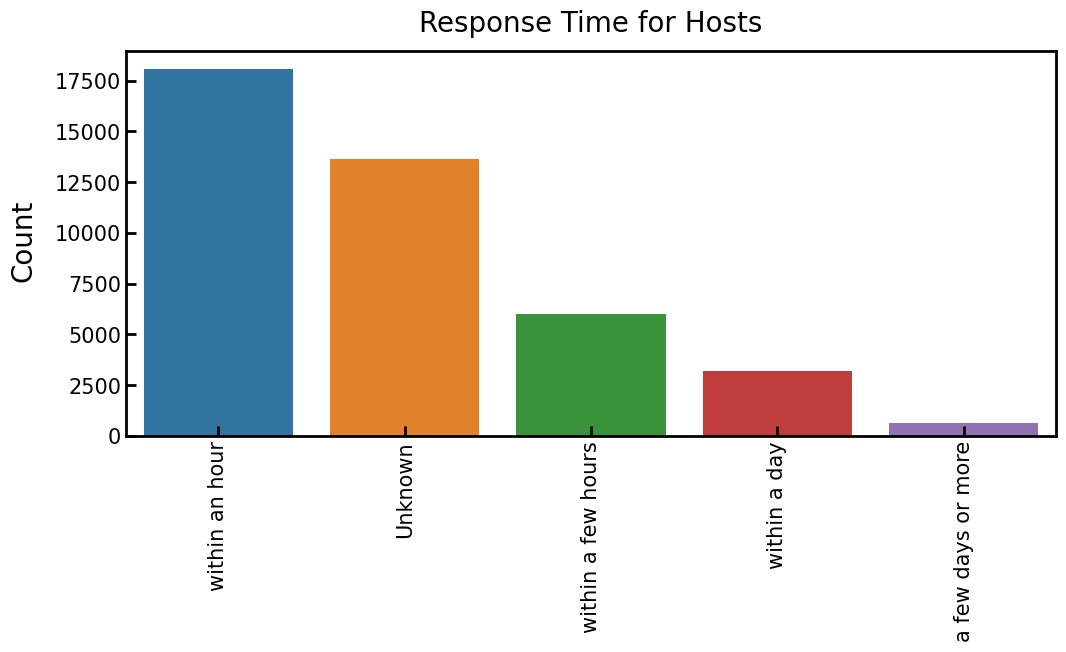

In [1030]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = list(dictionary.keys()), y = list(dictionary.values()), ax = ax)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

# fig.text(0.5, -0.35, 'Time', ha='center', va='center', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)


It is clear that majority of hosts respond within an hour. Similarly, there is a huge section of hosts whose responses were either not recorded properly or did not respond at all. The price of a rental might depend upon this column due to the fact that quickly responding to potential customers about rental information could be an important factors for guest to decide to book a particular rental. For now, we will keep this column and later do additional analysis to check if we will really need this column for modelling purposes.

In [1031]:
# df.drop('host_name', axis = 1, inplace = True)
# check_column_presence('host_name')
# columns_that_are_dropped.append('host_about')

### 17. `host_response_rate` column

In [1032]:
available_columns[17]

'host_response_rate'

In [1033]:
df['host_response_rate']

0         72%
1         N/A
2         N/A
3         90%
4        100%
         ... 
41528    100%
41529    100%
41530     98%
41531     N/A
41532     83%
Name: host_response_rate, Length: 41533, dtype: object

In [1034]:
df['host_response_rate'].unique()

array(['72%', 'N/A', '90%', '100%', '94%', '33%', '80%', '60%', '91%',
       '99%', '0%', '93%', '67%', '83%', '50%', '88%', '78%', '92%',
       '63%', '75%', '82%', '86%', '70%', '71%', '89%', '96%', '40%',
       '73%', '20%', '98%', '97%', '64%', '85%', '87%', '25%', '62%',
       '43%', '84%', '56%', nan, '58%', '95%', '38%', '13%', '10%', '22%',
       '65%', '17%', '14%', '44%', '81%', '79%', '57%', '61%', '77%',
       '69%', '26%', '55%', '76%', '30%', '29%', '46%', '68%', '31%',
       '74%', '53%', '54%', '41%', '51%'], dtype=object)

In [1035]:
df['host_response_rate'].isnull().sum()

5

Only five null values shouldn't be a problem. How often a host responds to user inquires could play an important role over the price of a rental. Therefore, we will perform further analysis on this column. 

### 18. `host_acceptance_rate` column

In [1036]:
available_columns[18]

'host_acceptance_rate'

In [1037]:
df['host_acceptance_rate']

0         22%
1         N/A
2         50%
3         82%
4        100%
         ... 
41528    100%
41529    100%
41530     86%
41531     N/A
41532    100%
Name: host_acceptance_rate, Length: 41533, dtype: object

In [1038]:
df['host_acceptance_rate'].isnull().sum()

5

In [1039]:
df['host_acceptance_rate'].unique()

array(['22%', 'N/A', '50%', '82%', '100%', '13%', '54%', '98%', '96%',
       '97%', '0%', '83%', '95%', '86%', '85%', '46%', '40%', '67%',
       '10%', '25%', '99%', '87%', '88%', '33%', '38%', '20%', '61%',
       '73%', '60%', '65%', '64%', '30%', '94%', '89%', '91%', '93%',
       '78%', '35%', '5%', '36%', '75%', '53%', '43%', '39%', '70%',
       '80%', '92%', '23%', '17%', '49%', '76%', '63%', '69%', '57%',
       '74%', '62%', '79%', '21%', '90%', '84%', '14%', '71%', '81%',
       '77%', '55%', '72%', '15%', '29%', '44%', '45%', '47%', '19%',
       '56%', '68%', '28%', '52%', '59%', '34%', '48%', '27%', '18%',
       '66%', '58%', '7%', '42%', '11%', '32%', '16%', '51%', '26%',
       '12%', '41%', nan, '37%', '4%', '8%', '31%', '9%', '6%', '24%'],
      dtype=object)

This column could play an important role in determining the price of a rental. If a host is very much likely to accept user inquiries and bookings, more people might prefer to choose the corresponding rental ultimately driving up its price.
Similarly, if a host has vey low acceptance rate, customers might imply that the host has too many restrictions on his rental which is why he/she doesnot generally accept bookings. We will keep this column for now to do additional analysis.

### 19. `host_is_superhost` column

In [1040]:
available_columns[19]

'host_is_superhost'

In [1041]:
data_dictionary['host_is_superhost']

'A binary value indicating whether or not the Airbnb host is a Superhost.'

In [1042]:
df['host_is_superhost'].isnull().sum()

29

39 null values should not be much of a problem for us as we have enough data to fill the null values.

In [1043]:
df['host_is_superhost'].value_counts()

f    32635
t     8869
Name: host_is_superhost, dtype: int64

It looks like the majority of hosts are not superhosts. This column could play an important role in determining the price of a rental. If a host is a `Superhost`, he/she is considered an experienced host and is very likely to consistently receive very high ratings from the customers who stayed in that rental. Additionally, being a superhost also provides customers with the assurance that the host is reliable, trustworthy and offers high quality of hospitality.

Therefore, we will keep this column for further analysis for now.

### 20. `host_thumbnail_url` column

In [1044]:
idx = 20
col = available_columns[20]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_thumbnail_url
DATA DICT:  The URL of the Airbnb host's thumbnail image.


In [1045]:
df[col]

0        https://a0.muscache.com/im/pictures/user/50fc5...
1        https://a0.muscache.com/im/users/7490/profile_...
2        https://a0.muscache.com/im/users/7378/profile_...
3        https://a0.muscache.com/im/pictures/user/72a61...
4        https://a0.muscache.com/im/users/15991/profile...
                               ...                        
41528    https://a0.muscache.com/im/pictures/user/cac77...
41529    https://a0.muscache.com/defaults/user_pic-50x5...
41530    https://a0.muscache.com/im/pictures/user/a5e30...
41531    https://a0.muscache.com/im/pictures/user/44c06...
41532    https://a0.muscache.com/im/pictures/user/2c04b...
Name: host_thumbnail_url, Length: 41533, dtype: object

In [1046]:
df[col].unique().shape

(26363,)

The thumbnail of a property should have absolutely no bearing in the price of a rental. Therefore, we will proceed to drop this column.

In [1047]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_thumbnail_url| has been removed !! 


### 21. `host_picture_url` column

In [1048]:
idx = 21
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_picture_url
DATA DICT:  The URL of the Airbnb host's main image.


In [1049]:
df[col]

0        https://a0.muscache.com/im/pictures/user/50fc5...
1        https://a0.muscache.com/im/users/7490/profile_...
2        https://a0.muscache.com/im/users/7378/profile_...
3        https://a0.muscache.com/im/pictures/user/72a61...
4        https://a0.muscache.com/im/users/15991/profile...
                               ...                        
41528    https://a0.muscache.com/im/pictures/user/cac77...
41529    https://a0.muscache.com/defaults/user_pic-225x...
41530    https://a0.muscache.com/im/pictures/user/a5e30...
41531    https://a0.muscache.com/im/pictures/user/44c06...
41532    https://a0.muscache.com/im/pictures/user/2c04b...
Name: host_picture_url, Length: 41533, dtype: object

In [1050]:
df[col].unique().shape

(26363,)

This column contains the url to the host's profile picture. This column should also have no bearing in the property's price. So, we will proceed to drop this column. 

In [1051]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_picture_url| has been removed !! 


### 22. `host_neighbourhood` column

In [1052]:
idx = 22
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_neighbourhood
DATA DICT:  The neighbourhood where the Airbnb host lives.


In [1053]:
df[col]

0                   Midtown
1           Upper West Side
2         Greenwood Heights
3        Bedford-Stuyvesant
4              Williamsburg
                ...        
41528            West Bronx
41529               Jamaica
41530                   NaN
41531            East Bronx
41532                   NaN
Name: host_neighbourhood, Length: 41533, dtype: object

In [1054]:
df[col].value_counts()

Bedford-Stuyvesant             2421
Williamsburg                   2031
Bushwick                       1458
Jamaica                        1274
Flushing                       1190
                               ... 
Bromley-by-Bow                    1
Sugar House                       1
Cannonborough Elliotborough       1
Block E2                          1
Little Saigon                     1
Name: host_neighbourhood, Length: 539, dtype: int64

This column is very much unlikely to be very useful for predicting price. It is so because this column provides information about the location of the neighbour where the actual host resides and not the neighbourhood of the rental itself. Since I could be staying in kathmandu and operate a rental in New york city, my rental's price in NYC should have absolutely no relationship whatsoever. So, we will proceed to drop this column.

In [1055]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_neighbourhood| has been removed !! 


### 23. `host_listings_count` column

In [1056]:
idx = 23
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_listings_count
DATA DICT:  The number of listings that the Airbnb host has on the platform.


In [1057]:
df[col].value_counts()

1      20037
2       5930
3       2883
4       1912
5       1155
       ...  
408        1
349        1
188        1
169        1
91         1
Name: host_listings_count, Length: 116, dtype: int64

A host with many listings available could potentially show that host is an experienced person. Similarly, someone with relatively low listings indicates that they are probably new to the platform and are inexperienced. A tourist might feel more comfortable staying at someone's property if they are experienced. So, this could could be important. We will keep it for further analysis. 

### 24. `host_total_listings_count` column

In [1058]:
idx = 24
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_total_listings_count
DATA DICT:  The total number of listings that the Airbnb host has on all platforms.


In [1059]:
df[col].value_counts()

1       12527
2        7422
3        4547
4        2870
5        1900
        ...  
88          1
84          1
2761        1
151         1
127         1
Name: host_total_listings_count, Length: 143, dtype: int64

This column is very similar to previous column `host_listings_count`. Both column indicate the number of listings a host has on platforms. Therefore, we will proceed to drop this column altogether.

In [1060]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_total_listings_count| has been removed !! 


### 25. `host_verifications` column

In [1061]:
idx = 25
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_verifications
DATA DICT:  A list of verification methods used by the Airbnb host.


In [1062]:
df[col].value_counts()

['email', 'phone']                  32167
['email', 'phone', 'work_email']     5313
['phone']                            3836
['phone', 'work_email']               119
['email']                              61
[]                                     27
None                                    5
['email', 'work_email']                 5
Name: host_verifications, dtype: int64

This column contains the list of profile verification methods like email, phone and work_email. Out of available methods, a user could use any one to verify their accounts. Furthermore, their verification method will probably have no bearing in the price of their corresponding rental. So, we will drop this column.

In [1063]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_verifications| has been removed !! 


### 26. `host_has_profile_pic` column

In [1064]:
idx = 26
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_has_profile_pic
DATA DICT:  A binary value indicating whether or not the Airbnb host has a profile picture.


In [1065]:
df[col].value_counts()

t    40904
f      624
Name: host_has_profile_pic, dtype: int64

while the fact that a host has no profile picture might not be directly linked to the price of a rental, potential customers could feel more comfortable about contacting a host with profile picture and ask for inquiries. We will use this column for further analysis.

### 27. `host_identity_verified` column

In [1066]:
idx = 27
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_identity_verified
DATA DICT:  A binary value indicating whether or not the Airbnb host's identity has been verified.


In [1067]:
df[col].value_counts()

t    35262
f     6266
Name: host_identity_verified, dtype: int64

Similarly, customers might feel more confident in a rental whose owner's profile and identity has been verified. Therefore, we will proceed to keep this column for further analysis.

### 28. `neighbourhood` column

In [1068]:
idx = 28
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  neighbourhood
DATA DICT:  The neighbourhood where the Airbnb listing is located.


In [1069]:
df[col].value_counts()

New York, United States                        9649
Brooklyn, New York, United States              8997
Queens, New York, United States                3490
Bronx, New York, United States                  491
The Bronx, New York, United States              392
                                               ... 
ozone park queens , New York, United States       1
Jamaica , ny, United States                       1
New York, New York , United States                1
 Crown Heights,NY, New York, United States        1
Valley Stream, New York, United States            1
Name: neighbourhood, Length: 193, dtype: int64

The price of a rental is directly affected by the neighbourhood it is located on. For example, brooklyn neighbourhood of New york might be very expensive than other neighbourhoods in terms of living expenses which ultimately drives up the price of a rental.

But, there are two additional columns containing similar information about neighbourhood and this column contains too many unique values. So, we will drop this column and use another column that is equivalent to the information provided in this column.

In [1070]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |neighbourhood| has been removed !! 


### 29. `neighbourhood_cleansed` column

In [1071]:
idx = 29
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  neighbourhood_cleansed
DATA DICT:  The cleaned-up version of the neighbourhood name.


In [1072]:
df[col].value_counts()

Bedford-Stuyvesant    2936
Williamsburg          2570
Harlem                1949
Midtown               1918
Bushwick              1752
                      ... 
Woodrow                  1
Bull's Head              1
Westerleigh              1
New Dorp                 1
Hollis Hills             1
Name: neighbourhood_cleansed, Length: 223, dtype: int64

<b><u><i><font color='red'> MAYBE THIS CAN BE USED BY LABEL ENCODING?? ESMA SPECIFIC NEIGHBOURHOOD KO BAREMA INFO PANI XA

This column simply slices the strings available in previous column and take first element of the list. However, there are still too many unique column and there is an additional column that explains the neighbourhood location of a rental. 

But, we will use this column for spatial analysis by creating a heatmap. So, we will keep this column for now.

In [1073]:
# df.drop(col, axis = 1, inplace = True)
# print(check_column_presence(col))
# columns_that_are_dropped.append(col)

### 30. `neighbourhood_group_cleansed` column

In [1074]:
idx = 30
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  neighbourhood_group_cleansed
DATA DICT:  The cleaned-up version of the neighbourhood group name.


In [1075]:
df[col].value_counts()

Manhattan        17334
Brooklyn         15688
Queens            6519
Bronx             1587
Staten Island      405
Name: neighbourhood_group_cleansed, dtype: int64

This column explains the number of rentals present in each neighbourhood. Since Manhattan and Brooklyn are two most populus and tourist attraction regions of NYC, it is appropriate in business terms to establish a rental in this region, which can drive up the price as these areas are pretty expensive. We will keep this column as it could be very important for price modeling.

### 31. `latitude` column

In [1076]:
idx = 31
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  latitude
DATA DICT:  The latitude coordinate of the Airbnb listing.


This column contains the latitude of the airbnb listing. It will be useful for performing geospatial analysis.

### 32. `longitude` column

In [1077]:
idx = 32
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  longitude
DATA DICT:  The longitude coordinate of the Airbnb listing.


This column contains the longitude of the airbnb listing. It will be useful for performing geospatial analysis.

### 33. `property_type` column

In [1078]:
idx = 33
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  property_type
DATA DICT:  The type of property being listed on Airbnb (e.g. Apartment, House, etc.).


In [1079]:
df[col].value_counts()

Entire rental unit                    17579
Private room in rental unit           10995
Private room in home                   2198
Entire condo                           1690
Entire home                            1568
                                      ...  
Private room in religious building        1
Private room in tent                      1
Private room in dorm                      1
Private room in farm stay                 1
Shared room in shepherd's hut             1
Name: property_type, Length: 80, dtype: int64

The type of a rental could have direct impact on its price. For example, an entire rental unit or condo could be more expensive than a shared room. We will keep this column for further analysis.

<b><i><u><font color='red'>If the "property_type" column has too many unique values, it can be difficult to work with in some predictive models. One approach to address this issue is to group similar property types together into broader categories.For example, you could group all apartments (e.g. apartment, loft, studio, etc.) into one category, all houses (e.g. house, townhouse, villa, etc.) into another category, and so on. You could also consider grouping properties based on their size or capacity (e.g. small, medium, large), their location (e.g. urban, suburban, rural), or any other relevant factor that you believe may impact rental prices. To do this, you can create a new column that maps each unique property type to its corresponding category. You can use domain knowledge or data exploration techniques to help guide your decisions on how to group the property types. Once you have created this new column, you can drop the original "property_type" column from your dataset and use the new, grouped column as a predictor of rental prices.

### 34. `room_type` column

In [1080]:
idx = 34
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  room_type
DATA DICT:  The type of room being listed on Airbnb (e.g. Private room, Entire home/apt, etc.).


In [1081]:
df[col].value_counts()

Entire home/apt    23526
Private room       17287
Shared room          532
Hotel room           188
Name: room_type, dtype: int64

The "room_type" column indicates the type of room being rented (e.g. entire home/apt, private room, shared room, etc.). It could be important so we will keep this for additional analysis

<b><i><u><font color='red'> The "property_type" column describes the type of property being rented (e.g. apartment, house, condominium, etc.), while the "room_type" column describes the type of room being rented (e.g. entire home/apt, private room, shared room, etc.). The "property_type" column provides information about the overall type of dwelling being rented, while the "room_type" column provides information about the specific part of the property that is being rented out. For example, a property type of "apartment" indicates that the entire dwelling unit is being rented, while a room type of "private room" indicates that only a single private room within that apartment is being rented. Both columns can be useful predictors of rental prices, as they provide different types of information about the rental property. 

### 35. `accommodates` column

In [1082]:
idx = 35
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  accommodates
DATA DICT:  The maximum number of guests the Airbnb listing can accommodate.


In [1083]:
df[col].value_counts()

2     18556
4      6621
1      6432
3      4006
6      2176
5      1705
8       738
7       446
10      251
16      205
12      164
9       102
15       37
11       32
14       28
13       18
0        16
Name: accommodates, dtype: int64

This column indicates the number of accomodates to allow in the airbnb rental. The "accommodates" column can be a useful predictor of rental prices, as properties that can accommodate more guests may be more in demand and therefore have higher prices. So, we will keep this column for further analysis.

### 36. `bathrooms_text` column

In [1084]:
# sorted(list(data_dictionary.keys())) #bathrooms

In [1085]:
idx = 36
col = available_columns[idx]
print("COLUMN: ", col)
# print("DATA DICT: ", data_dictionary['bathrooms'])

COLUMN:  bathrooms_text


In [1086]:
df[col].value_counts()

1 bath               21760
1 shared bath         9589
1 private bath        2893
2 baths               2729
1.5 baths             1165
2 shared baths        1109
1.5 shared baths       722
2.5 baths              400
3 baths                303
0 shared baths         157
4 baths                126
3.5 baths              106
3 shared baths          95
2.5 shared baths        82
0 baths                 57
Half-bath               40
4.5 baths               36
Shared half-bath        17
5 baths                 16
4 shared baths          14
Private half-bath       12
6 baths                  8
5.5 baths                8
6.5 baths                3
3.5 shared baths         2
4.5 shared baths         2
6 shared baths           2
15.5 baths               1
7 baths                  1
8 baths                  1
Name: bathrooms_text, dtype: int64

This column will be useful as various number of bathrooms could increase the demand of a rental and ultimately increasing the price. So, we will do further analysis in this column.

<b><i><u><font color='red'> To convert the "bathrooms_text" column into a simpler form, you can extract the numerical value for the number of bathrooms using regular expressions or string manipulation techniques. Here's an example code snippet in Python that demonstrates how to extract the number of bathrooms from the "bathrooms_text" column and convert it into a numeric format:
`

<b> Extract the numerical value from the "bathrooms_text" column using regular expressions

df["bathrooms"] = df["bathrooms_text"].str.extract(r"(\d+(?:\.\d+)?)").astype(float)

<b> Drop the original "bathrooms_text" column

df = df.drop("bathrooms_text", axis=1)

`
in this code snippet, we use the str.extract() method from Pandas to extract the numerical value from the "bathrooms_text" column. The regular expression r"(\d+(?:\.\d+)?) matches one or more digits followed by an optional decimal point and more digits, and extracts this as a string. We then convert this extracted string into a float using the astype() method.

<b><i><u><font color='red'>
After extracting the numerical value for the number of bathrooms, we can drop the original "bathrooms_text" column using the drop() method.


In [1087]:
# a = df["bathrooms_text"].str.extract(r"(\d+(?:.\d+)?)").astype(float)

### 37. `beds` column

In [1088]:
idx = 37
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  beds
DATA DICT:  The number of beds available in the Airbnb listing.


In [1089]:
df[col].value_counts()

1     25557
2      8894
3      3486
4      1528
5       538
6       307
7       101
8        94
9        34
10       20
12       12
11       11
14        3
16        2
18        1
42        1
21        1
13        1
17        1
Name: beds, dtype: int64

Higher the number of a bed could increase the price of a rental. So, we will use this column for further analysis.

### 38. `amenities` column

In [1090]:
idx = 38
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  amenities
DATA DICT:  A list of amenities available in the Airbnb listing (e.g. Wifi, TV, etc.).


In [1091]:
df[col].value_counts()[:3]

["Long term stays allowed"]                                                                                                                                                                                                     131
["Smoke alarm", "Carbon monoxide alarm", "Washer", "Wifi", "TV", "Kitchen", "Long term stays allowed", "Air conditioning"]                                                                                                       77
["Smoke alarm", "Carbon monoxide alarm", "First aid kit", "Shampoo", "Heating", "Wifi", "Air conditioning", "Fire extinguisher", "Elevator", "TV", "Long term stays allowed", "Iron", "Essentials", "Hangers", "Hair dryer"]     69
Name: amenities, dtype: int64

If a rental unit has many ameneties, it would make the rental more attractive for potential customers. Therefore, this column will be very important. However, this column contains too many unique values. So, it will need good preprocessing. We will keep this column for further analysis.

### 39. `price` column

In [1092]:
idx = 39
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  price
DATA DICT:  The nightly price of the Airbnb listing.


In [1093]:
df[col]

0          $175.00
1           $75.00
2          $275.00
3           $60.00
4           $68.00
           ...    
41528      $105.00
41529       $87.00
41530       $70.00
41531      $125.00
41532    $1,114.00
Name: price, Length: 41533, dtype: object

<b> This is the column which will be used for making predictions. This column is very messy and will need preprocessing. Additionally, we will be predicting price range for a rental with specific properties. So, this continuous column will be converted to a categorical form.

### 40. `minimum_nights` column

In [1094]:
idx = 40
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  minimum_nights
DATA DICT:  The minimum number of nights required to book the Airbnb listing.


In [1095]:
df[col].value_counts()

30     17625
1       7202
2       5329
3       3780
5       1492
       ...  
153        1
999        1
53         1
19         1
88         1
Name: minimum_nights, Length: 126, dtype: int64

Like previous column, a rental's requirement that a customer has to stay up to a minimum period of time at most will play an important role in its price. So, we will use this column for additional analysis. 

### 41. `maximum_nights` column

In [1096]:
idx = 41
col = available_columns[idx]
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  maximum_nights
DATA DICT:  The maximum number of nights allowed for a booking of the Airbnb listing.


In [1097]:
df[col]

0        1125
1          14
2        1125
3         730
4         730
         ... 
41528     365
41529     365
41530      30
41531      30
41532     365
Name: maximum_nights, Length: 41533, dtype: object

Like previous column, a rental's requirement that a customer can only stay up to a given period of time at most will play an important role in its price. So, we will use this column for additional analysis. 

### 42. `minimum_minimum_nights` column

In [1098]:
idx = 42
col = available_columns[idx]
print("COLUMN: ", col)
# print("DATA DICT: ", data_dictionary[col])

COLUMN:  minimum_minimum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1099]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |minimum_minimum_nights| has been removed !! 


### 43. `maximum_minimum_nights` column

In [1100]:
idx = 43
col = available_columns[idx]
print("COLUMN: ", col)
# print("DATA DICT: ", data_dictionary[col])

COLUMN:  maximum_minimum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1101]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |maximum_minimum_nights| has been removed !! 


### 44. `maximum_minimum_nights` column

In [1102]:
idx = 44
col = available_columns[idx]
print("COLUMN: ", col)

COLUMN:  minimum_maximum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1103]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |minimum_maximum_nights| has been removed !! 


### 45. `maximum_maximum_nights` column

In [1104]:
idx = 45
col = available_columns[idx]
print("COLUMN: ", col)

COLUMN:  maximum_maximum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1105]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |maximum_maximum_nights| has been removed !! 


### 46. `minimum_nights_avg_ntm` column

In [1106]:
idx = 46
col = available_columns[idx]
print("COLUMN: ", col)

COLUMN:  minimum_nights_avg_ntm


The information provided by this column is already given by previous column. So, I will drop this column.

In [1107]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |minimum_nights_avg_ntm| has been removed !! 


### 47. `maximum_nights_avg_ntm` column

In [1108]:
idx = 47
col = available_columns[idx]
print("COLUMN: ", col)

COLUMN:  maximum_nights_avg_ntm


The information provided by this column is already given by previous column. So, I will drop this column.

In [1109]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |maximum_nights_avg_ntm| has been removed !! 


### 48. `has_availability` column

In [1110]:
idx = 48
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  has_availability


'A binary value indicating whether or not the Airbnb listing is currently available.'

In [1111]:
df[col].value_counts()

t    35281
f     6252
Name: has_availability, dtype: int64

This column might not be useful for predicting price because the values in this column are not real-time. It contains information about whether a rental is currently available or not. Since we will pre predicting the price of a rental, this column might not be very useful as a tourist will be looking for an available rental to book.

In [1112]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |has_availability| has been removed !! 


### 49. `availability_30` column

In [1113]:
idx = 49
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_30


'The number of available nights in the next 30 days.'

In [1114]:
df[col]

0        30
1         0
2         0
3        11
4        23
         ..
41528     9
41529    26
41530    20
41531    18
41532    20
Name: availability_30, Length: 41533, dtype: object

The availability_30 column in the Airbnb NYC dataset represents the number of days the rental property is available for booking in the next 30 days. However, this column may not be directly related to the rental price of the property. For example, a property that is highly in demand may have a higher rental price, but the relationship between availability and rental price may not be straightforward.


But, the data here is not in real time. So, we will drop this column.

In [1115]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_30| has been removed !! 


### 50. `availability_60` column

In [1116]:
idx = 50
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_60


'The number of available nights in the next 60 days.'

This column explains the number of days the rental propertey is available for booking in the next 60 days. We will drop this column as if there is a relationship between availability and price, then we can get that relationship from availability_30 column.

In [1117]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_60| has been removed !! 


### 51. `availability_90` column

In [1118]:
idx = 51
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_90


'The number of available nights in the next 90 days.'

Like in previous columns, we will proceed to drop this column as well.

In [1119]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_90| has been removed !! 


### 52. `availability_365` column

In [1120]:
idx = 52
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_365


'The number of available nights in the next 365 days.'

Similar to the previous column, we will also drop this column.

In [1121]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_365| has been removed !! 


### 53. `calendar_last_scraped` column

In [1122]:
idx = 53
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  calendar_last_scraped


'The date on which the Airbnb listing calendar was last scraped.'

In [1123]:
df[col]

0        2022-12-05
1        2022-12-05
2        2022-12-04
3        2022-12-05
4        2022-12-05
            ...    
41528    2022-12-05
41529    2022-12-05
41530    2022-12-05
41531    2022-12-04
41532    2022-12-05
Name: calendar_last_scraped, Length: 41533, dtype: object

This column contains date on which the airbnb listing calender data was scraped. So, there is no useful information in this column. So, we will proceed to drop this column.

In [1124]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calendar_last_scraped| has been removed !! 


### 54. `number_of_reviews` column

In [1125]:
idx = 54
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  number_of_reviews


'The total number of reviews for the Airbnb listing.'

In [1126]:
df[col]

0         49
1        118
2          3
3         50
4        187
        ... 
41528      0
41529      0
41530      0
41531      0
41532      0
Name: number_of_reviews, Length: 41533, dtype: object

The "number_of_reviews" column in the Airbnb NYC dataset represents the total number of reviews that a rental property has received from guests. This column can be useful in predicting rental prices because it gives an indication of the popularity and overall experience of the property. Generally, properties with more positive reviews are likely to command higher rental prices. That being said, it is important to note that the "number_of_reviews" column only provides information on the quantity of reviews, and not necessarily the quality of the reviews. Therefore, it is possible that a property with a high number of reviews could have a lower rental price than a property with fewer reviews but higher overall ratings.

We will keep this column for further analysis.

### 55. `number_of_reviews_ltm` column

In [1127]:
idx = 55
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  number_of_reviews_ltm


'The total number of reviews for the Airbnb listing in the last 12 months.'

In [1128]:
df[col]

0        1
1        0
2        1
3        0
4        5
        ..
41528    0
41529    0
41530    0
41531    0
41532    0
Name: number_of_reviews_ltm, Length: 41533, dtype: object

The "number_of_reviews_ltm" column in the Airbnb NYC dataset represents the number of reviews a rental property received in the last 12 months. This column is similar to the "number_of_reviews" column, but provides more recent data on the popularity of the rental property.

However, it is important that a rental property with a high number of recent reviews may not necessarily be more expensive than a property with fewer recent reviews but higher overall ratings.

So, we will drop this column.

In [1129]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |number_of_reviews_ltm| has been removed !! 


### 56. `number_of_reviews_l30d` column

In [1130]:
idx = 56
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  number_of_reviews_l30d


In [1131]:
df[col]

0        0
1        0
2        0
3        0
4        0
        ..
41528    0
41529    0
41530    0
41531    0
41532    0
Name: number_of_reviews_l30d, Length: 41533, dtype: object

We already have reviews information. So, additional similar column might not be very useful. So, we will drop this column.

In [1132]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |number_of_reviews_l30d| has been removed !! 


### 57. `first_review` column

In [1133]:
idx = 57
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  first_review


'The date of the first review for the Airbnb listing.'

In [1134]:
df[col]

0        2009-11-21
1        2009-09-07
2        2014-01-02
3        2009-05-28
4        2009-05-25
            ...    
41528           NaN
41529           NaN
41530           NaN
41531           NaN
41532           NaN
Name: first_review, Length: 41533, dtype: object

The date of first review for the Airbnb listing should have no bearing on its price. So, we can safely drop this column.

In [1135]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |first_review| has been removed !! 


### 58. `last_review` column

In [1136]:
idx = 58
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  last_review


'The date of the most recent review for the Airbnb listing.'

In [1137]:
df[col]

0        2022-06-21
1        2017-07-21
2        2022-08-10
3        2019-12-02
4        2022-11-02
            ...    
41528           NaN
41529           NaN
41530           NaN
41531           NaN
41532           NaN
Name: last_review, Length: 41533, dtype: object

Similarly, the date of last review for the Airbnb listing should have no bearing on its price. So, we can safely drop this column.

In [1138]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |last_review| has been removed !! 


### 59. `review_scores_rating` column

In [1139]:
idx = 59
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_rating


'The average rating score for the Airbnb listing.'

In [1140]:
df[col]

0        4.68
1        4.91
2         5.0
3        4.52
4        4.57
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_rating, Length: 41533, dtype: object

In [1141]:
df[col].describe()

count     32140
unique      164
top         5.0
freq       9459
Name: review_scores_rating, dtype: object

The "review_scores_rating" column in the Airbnb NYC dataset represents the overall rating of a rental property, as determined by the average of all the ratings provided by guests who have stayed at the property. This rating is on a scale of 1 to 100, with higher scores indicating better overall ratings. The "review_scores_rating" column can be a useful feature to include in your predictive model, as it provides an overall indication of the quality and popularity of the rental property. However, it is important to note that this rating may be influenced by factors such as the number of reviews, the timing of the reviews, and the individual preferences of the guests leaving the reviews. Additionally, it may be helpful to consider other features of the rental property in conjunction with the "review_scores_rating" column. For example, amenities, location, and other features of the property may also influence its overall price and popularity. Overall, the "review_scores_rating" column can be a useful feature to include in your predictive model, but it should be considered alongside other factors to provide a more complete understanding of the rental property's value and appeal.

So, we will keep this column for further analysis.

### 60. `review_scores_accuracy` column

In [1142]:
idx = 60
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_accuracy


'The average accuracy score for the Airbnb listing.'

In [1143]:
df[col]

0        4.73
1        4.83
2         5.0
3        4.22
4        4.59
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_accuracy, Length: 41533, dtype: object

The "review_scores_accuracy" column in the Airbnb NYC dataset represents the degree to which the listing description matches the actual rental property as rated by guests who have stayed at the property. This rating is on a scale of 1 to 10, with higher scores indicating that the description was more accurate.

The "review_scores_accuracy" column can be a useful feature to include in your predictive model, as it provides an indication of how well the listing description matches the actual property. However, it is important to note that this rating may be influenced by factors such as the individual preferences of the guests leaving the review and their personal expectations.

In addition to "review_scores_accuracy", other features of the rental property such as location, amenities, and size may also affect the overall accuracy of the listing description. Therefore, it may be helpful to consider multiple features of the rental property in conjunction with the "review_scores_accuracy" column when developing a predictive model.

Overall, while the "review_scores_accuracy" column can provide valuable insights into the accuracy of the listing description, it should be considered alongside other factors when predicting the rental property's value and appeal.

<b> We will use this column for further analysis

### 61. `review_scores_cleanliness` column

In [1144]:
idx = 61
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_cleanliness


'The average cleanliness score for the Airbnb listing.'

In [1145]:
df[col]

0        4.63
1        4.82
2         5.0
3        4.09
4        4.86
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_cleanliness, Length: 41533, dtype: object

The "review_scores_cleanliness" column in the Airbnb NYC dataset represents the degree to which the rental property was clean upon arrival, as rated by guests who have stayed at the property. This rating is on a scale of 1 to 10, with higher scores indicating that the property was cleaner.

The "review_scores_cleanliness" column can be a useful feature to include in your predictive model as it provides an indication of the overall cleanliness of the rental property. A clean and well-maintained property is generally considered more attractive to potential renters and may command a higher price.

However, it is important to note that the cleanliness rating may be subjective and influenced by factors such as the individual standards of the guests leaving the review. Additionally, the cleanliness of the property may not be the only factor influencing its value and appeal.

Therefore, while the "review_scores_cleanliness" column can provide valuable insights into the cleanliness of the rental property, it should be considered alongside other factors when predicting the rental property's value and appeal.

<B> This column will be useful for further analysis.

### 62. `review_scores_checkin` column

In [1146]:
idx = 62
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  review_scores_checkin


In [1147]:
df[col]

0        4.77
1        4.97
2         5.0
3        4.91
4        4.84
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_checkin, Length: 41533, dtype: object

The "review_scores_checkin" column may provide some useful information for predicting the price of a rental property, as guests' satisfaction with the check-in experience could influence their overall impression of the property and their willingness to pay a higher price. However, the column alone is unlikely to be a strong predictor of rental price, as there are many other factors that may be more influential, such as location, property size, and available amenities.

Therefore, while the "review_scores_checkin" column may be considered as a feature in a machine learning model for predicting rental price, it should be used in conjunction with other relevant features to build a more accurate and robust model.


So, this column will be used for further analysis.

### 63. `review_scores_communication` column

In [1148]:
idx = 63
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_communication


'The average communication score for the Airbnb listing.'

In [1149]:
df[col]

0         4.8
1        4.95
2         5.0
3        4.91
4         4.8
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_communication, Length: 41533, dtype: object

The "review_scores_communication" column could be a useful feature for predicting rental price, as good communication with guests can enhance their overall experience and satisfaction with the property. Guests who feel well-informed and supported by the host are more likely to leave positive reviews and recommend the property to others, which could translate into higher demand and higher prices.

However, as with other review score columns, "review_scores_communication" should not be considered in isolation but as part of a broader set of features. Other factors such as location, property size, amenities, and availability could also be important predictors of rental price, and a comprehensive analysis of these features should be conducted to build an accurate and reliable machine learning model.

So, this column will be used for further analysis.

### 64. `review_scores_location` column

In [1150]:
idx = 64
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  review_scores_location


In [1151]:
df[col]

0        4.81
1        4.94
2        4.67
3        4.47
4        4.67
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_location, Length: 41533, dtype: object

The "review_scores_location" column could be a useful feature for predicting rental price, especially if the property is located in a popular or desirable neighborhood. Guests who enjoy the location and surroundings of the property are more likely to leave positive reviews and recommend the property to others, which could translate into higher demand and higher prices.

However, it is important to keep in mind that the impact of location on rental price may vary depending on other factors such as property size, amenities, and availability. A comprehensive analysis of these features should be conducted to build an accurate and reliable machine learning model.

So, this column will be used for further analyis.

### 65. `review_scores_value` column

In [1152]:
idx = 65
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  review_scores_value


In [1153]:
df[col]

0         4.4
1        4.92
2         5.0
3        4.52
4        4.56
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: review_scores_value, Length: 41533, dtype: object

The "review_scores_value" column could also be a useful feature for predicting rental price. This metric represents how much guests feel they got for their money in terms of the property's quality and amenities. Properties with higher ratings in this category may be able to command higher prices, especially if they are in a desirable location or have other attractive features.

However, as with the other review score columns, it is important to consider this feature in the context of other factors that may influence rental prices. A thorough analysis of the dataset, including all relevant features, should be conducted to build an accurate and reliable machine learning model.

### 66. `instant_bookable` column

In [1154]:
idx = 66
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  instant_bookable


In [1155]:
df[col].value_counts()

f    33123
t     8410
Name: instant_bookable, dtype: int64

The "instant_bookable" column could be a useful feature for predicting rental price. This column indicates whether the property is available for instant booking or requires approval from the host before a booking can be made. Properties that are available for instant booking may be more convenient for guests and therefore may be able to command higher prices, especially in areas where demand for rentals is high.

### 67. `calculated_host_listings_count` column

In [1156]:
idx = 67
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count


In [1157]:
df[col]

0         3
1         1
2         1
3         2
4         1
         ..
41528     1
41529     1
41530    37
41531     1
41532     2
Name: calculated_host_listings_count, Length: 41533, dtype: object

The calculated_host_listings_count column represents the total number of listings that a host has on Airbnb in a particular city. This information may not be directly useful for predicting the price of a particular listing, as it relates to the host rather than the listing itself. However, it could potentially be used as a feature to capture some aspect of the host's experience and reputation on Airbnb, which could indirectly impact the price of their listings.

So, we will be droping this column.

In [1158]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count| has been removed !! 


### 68. `calculated_host_listings_count_entire_homes` column

In [1159]:
idx = 68
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count_entire_homes


In [1160]:
df[col]

0        3
1        0
2        1
3        0
4        1
        ..
41528    1
41529    0
41530    2
41531    1
41532    2
Name: calculated_host_listings_count_entire_homes, Length: 41533, dtype: object

The calculated_host_listings_count_entire_homes column represents the number of entire homes or apartments that are listed by the host, based on the listings data. It could potentially be useful in predicting the price of a rental, as hosts who list multiple entire homes may have different pricing strategies compared to hosts who list only a single room or share their own home.

However, this column is closely related to other columns such as room_type and property_type, which also provide information about the type of listing. So, we will drop this column.

In [1161]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count_entire_homes| has been removed !! 


### 69. `calculated_host_listings_count_private_rooms` column

In [1162]:
idx = 69
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count_private_rooms


In [1163]:
df[col]

0         0
1         1
2         0
3         2
4         0
         ..
41528     0
41529     1
41530    35
41531     0
41532     0
Name: calculated_host_listings_count_private_rooms, Length: 41533, dtype: object

The calculated_host_listings_count_private_rooms column is a subcategory of the calculated_host_listings_count column, which represents the number of listings that a host has across all room types. Specifically, calculated_host_listings_count_private_rooms represents the number of listings that a host has for private rooms only.

This column could be useful in predicting price, as hosts with more private room listings may have a different pricing strategy than hosts with mostly entire home listings. However, the usefulness of this column depends on the specific research question and analysis being conducted.

<b> We will be dropping this column.

In [1164]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count_private_rooms| has been removed !! 


### 70. `calculated_host_listings_count_shared_rooms` column

In [1165]:
idx = 70
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count_shared_rooms


The calculated_host_listings_count_shared_rooms column indicates the number of listings that are shared rooms in the host's total number of listings. This column may not be particularly useful in predicting the price of a rental, as it only pertains to a subset of listings and may not have a strong correlation with price. It could potentially be dropped if it is not relevant to the specific analysis being conducted.

In [1166]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count_shared_rooms| has been removed !! 


### 71. `reviews_per_month` column

In [1167]:
idx = 71
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  reviews_per_month


In [1168]:
df[col]

0        0.31
1        0.73
2        0.03
3        0.30
4        1.13
         ... 
41528     NaN
41529     NaN
41530     NaN
41531     NaN
41532     NaN
Name: reviews_per_month, Length: 41533, dtype: object

The reviews_per_month column in the Airbnb dataset provides the average number of reviews per month for a listing. This column can be useful for predicting the popularity of a listing or its occupancy rate, but it may not have a direct impact on the price prediction. However, it could still be included as a feature in a machine learning model if it is found to be correlated with the target variable (i.e., the price).

So, we will drop this column.




In [1169]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |reviews_per_month| has been removed !! 


### 72. `bedrooms` column

In [1170]:
idx = 72
col = available_columns[idx]
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  bedrooms


'The number of bedrooms available in the Airbnb listing.'

In [1171]:
df[col]

0        NaN
1          1
2          2
3          1
4        NaN
        ... 
41528      2
41529      1
41530      1
41531      2
41532      2
Name: bedrooms, Length: 41533, dtype: object

This column will be important.

### 73. `license` column

In [1172]:
idx = 73
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  license


In [1173]:
df[col].isnull().sum() / df.shape[0]

0.9999759227602147

Almost all of the values in this column are Null. So, we can simply drop this column as it is of no use to us.

In [1174]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |license| has been removed !! 


### 74. `Picture URL` column

In [1175]:
col = 'picture_url'

In [1176]:
data_dictionary['picture_url']

'The URL of the main image of the Airbnb listing.'

In [1177]:
df['picture_url']

0        https://a0.muscache.com/pictures/f0813a11-40b2...
1        https://a0.muscache.com/pictures/103776/b37157...
2        https://a0.muscache.com/pictures/miso/Hosting-...
3        https://a0.muscache.com/pictures/2090980c-b68e...
4        https://a0.muscache.com/pictures/e4f031a7-f146...
                               ...                        
41528    https://a0.muscache.com/pictures/miso/Hosting-...
41529    https://a0.muscache.com/pictures/miso/Hosting-...
41530    https://a0.muscache.com/pictures/miso/Hosting-...
41531    https://a0.muscache.com/pictures/miso/Hosting-...
41532    https://a0.muscache.com/pictures/miso/Hosting-...
Name: picture_url, Length: 41533, dtype: object

This column has no useful information. So, we drop this column as well/

In [1178]:
df.drop(col, axis = 1, inplace = True)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |picture_url| has been removed !! 


In [1179]:
len(columns_that_are_dropped)

44

In [1180]:
# df.to_csv("Semi_cleaned_dataset.csv", index = True)

In [1181]:
75 - 44

31

### 75. `Price` column

we will be predicting the price. So, we will need this column for modelling purpose.

## Cleaning and visualizing columns

In [1182]:
features_for_modelling = []

In [1183]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'bedrooms'],
      dtype='object')

In [1184]:
df

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bedrooms
0,within a day,72%,22%,f,6,t,t,Midtown,Manhattan,40.75356,...,49,4.68,4.73,4.63,4.77,4.8,4.81,4.4,f,NaN
1,Unknown,N/A,N/A,f,1,t,t,Upper West Side,Manhattan,40.8038,...,118,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,1
2,Unknown,N/A,50%,f,1,t,t,Sunset Park,Brooklyn,40.66265,...,3,5.0,5.0,5.0,5.0,5.0,4.67,5.0,f,2
3,within a day,90%,82%,t,2,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,...,50,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,1
4,within an hour,100%,100%,f,1,t,t,Williamsburg,Brooklyn,40.70935,...,187,4.57,4.59,4.86,4.84,4.8,4.67,4.56,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,within an hour,100%,100%,f,1,t,t,Kingsbridge,Bronx,40.87093610000001,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2
41529,within a few hours,100%,100%,f,1,f,t,Jamaica,Queens,40.6989115737136,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1
41530,within an hour,98%,86%,f,40,t,t,Morningside Heights,Manhattan,40.80259,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1
41531,Unknown,N/A,N/A,f,1,t,t,Unionport,Bronx,40.828074,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2


## Cleaning and exploring `price` column

In [1221]:
df['price']

0         175.0
1          75.0
2         275.0
3          60.0
4          68.0
          ...  
41528     105.0
41529      87.0
41530      70.0
41531     125.0
41532    1114.0
Name: price, Length: 41533, dtype: float32

we will drop `$` as we need raw numbers for further analysis. Additionally, I will proceed to convert the values to float64.

In [1222]:
df['price'].iloc[0].replace("$", "")

AttributeError: 'numpy.float32' object has no attribute 'replace'

In [1223]:
df['price'] = df['price'].apply(lambda x : x.replace("$", ""))

AttributeError: 'float' object has no attribute 'replace'

In [1224]:
df['price'].iloc[41532]

1114.0

we still need to remove comma from the values.

In [1225]:
df['price'] = df['price'].apply(lambda x : x.replace(",", ""))

AttributeError: 'float' object has no attribute 'replace'

In [1226]:
df['price'] = df['price'].astype(np.float32)

<b> lets remove and cap outliers with a maximum possible value. We will use outlier formula with Inter quartile range for outlier remvoal

In [1227]:
price = df['price']

In [1228]:
q1 = np.quantile(price, 0.25)
q3 = np.quantile(price, 0.75)

print("Q1: ", q1)
print("Q3: ", q3)

Q1:  80.0
Q3:  220.0


In [1229]:
iqr = q3 - q1;iqr

140.0

In [1230]:
range_out = [q1 - 1.5 * iqr, q3 + 1.5 * iqr];range_out

[-130.0, 430.0]

In [1231]:
price_outlier_removed = price.apply(lambda x: range_out[0] if x < range_out[0] else range_out[1] if x > range_out[1] else x)

Text(0.5, 0.95, 'Distribution of Price')

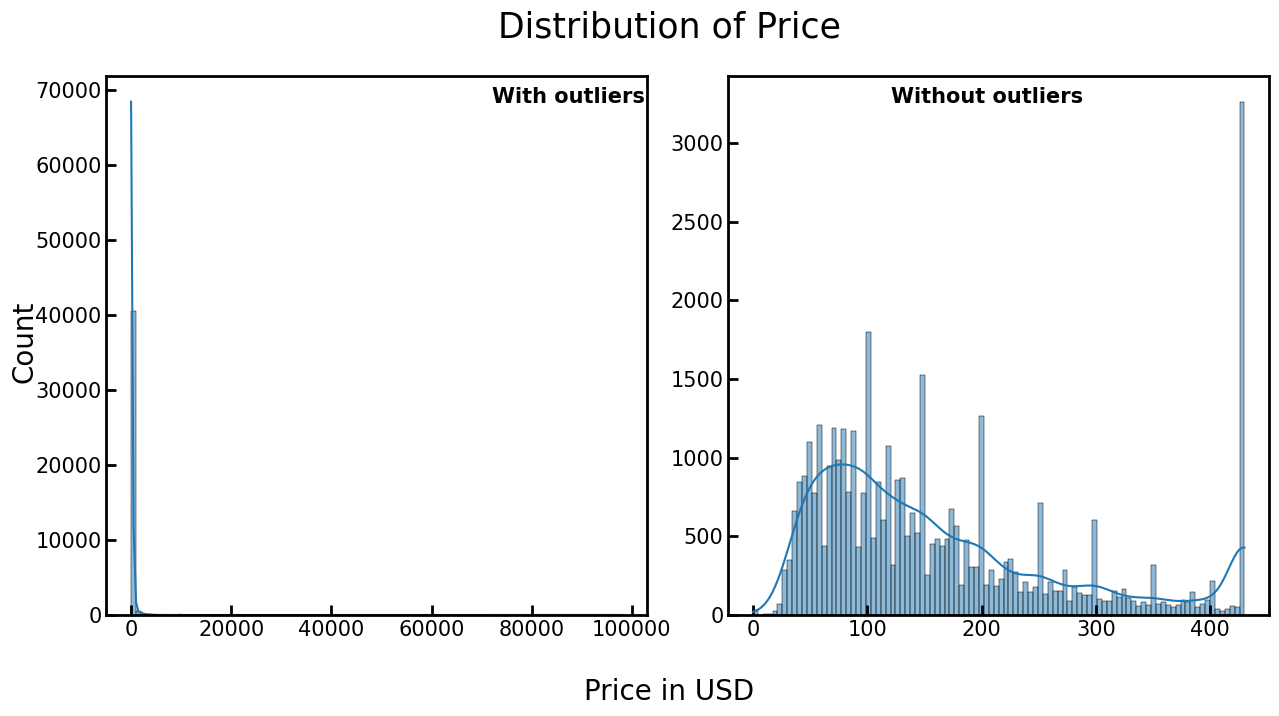

In [1232]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

ax = plt.subplot(1, 2, 1)

hist_with_outliers = sns.histplot(x = df['price'], kde = True, bins = 100, ax = ax)
ax.set_ylabel("")
ax.set_xlabel("")

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax.text(0.45, 1.45, "With outliers", horizontalalignment='center',\
     transform=ax1.transAxes, fontsize = 15, fontweight="bold", rotation = 'horizontal')


ax = plt.subplot(1, 2, 2)

hist_without_outliers = sns.histplot(x = price_outlier_removed, kde = True, bins = 100, ax = ax)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("")
ax.set_xlabel("")

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.text(0.9, 1.45, "Without outliers", horizontalalignment='center',\
     transform=ax1.transAxes, fontsize = 15, fontweight="bold", rotation = 'horizontal')

plt.subplots_adjust(wspace=0.15, hspace=0.075)
fig.text(0.07, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Price in USD', ha='center', va='center', rotation='horizontal', fontsize = 20)

fig.text(0.5, 0.95, 'Distribution of Price', ha='center', va='center', rotation='horizontal', fontsize = 25)

# plt.savefig('percentage_of_null_values.jpg',  bbox_inches='tight', dpi = 500)

In [1233]:
print("THE Maximum cost of a rental is: ", price.max()) # maximum price of a rental

THE Maximum cost of a rental is:  98159.0


In [1234]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'bedrooms'],
      dtype='object')

In [1235]:
df.groupby('neighbourhood_group_cleansed')['price'].mean()

neighbourhood_group_cleansed
Bronx            180.816635
Brooklyn         171.926437
Manhattan        301.211670
Queens           135.656387
Staten Island    320.343201
Name: price, dtype: float32

<b> 780 rentals are priced more than $ 1000.

It can be seen that the price column is very much positively or right skewed. It looks like majority of the rentals have price between 50 to 300. Some rentals are extremely expensive. Some are even higher than 1000. One costs $ 98159 which seems to indicate there are another variables at play here. Perhaps, the rental is a penthouse located in an extremely expensive neighbourhood?. We will need to look into it. We will keep the original column as it is because we can't simply remove outliers unless we are certain that they are not errors but correct values.

In [1236]:
df['price_outlier_removed'] = price_outlier_removed

## `host_response_time` vs `Price`

In [1237]:
df['host_response_time'].value_counts()

within an hour        18063
Unknown               13645
within a few hours     5997
within a day           3201
a few days or more      627
Name: host_response_time, dtype: int64

In [1238]:
dictionary

{'within an hour': 18063,
 'Unknown': 13645,
 'within a few hours': 5997,
 'within a day': 3201,
 'a few days or more': 627}

In [1239]:
price_vs_response_time = df.groupby('host_response_time')['price'].median().reset_index()
price_vs_response_time['Count'] = [13645, 627, 3201, 5997, 18063]
price_vs_response_time

,host_response_time,price,Count
0,Unknown,106.0,13645
1,a few days or more,142.0,627
2,within a day,145.0,3201
3,within a few hours,125.0,5997
4,within an hour,153.0,18063


Text(0.04, 0.5, 'Count')

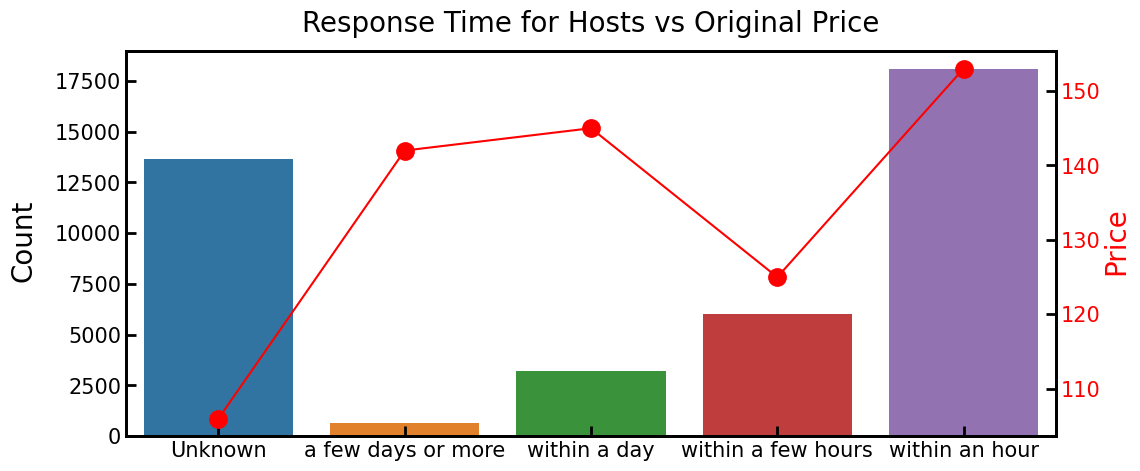

In [1240]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = price_vs_response_time['host_response_time'], y = price_vs_response_time['Count'], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(range(5), price_vs_response_time['price'], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts vs Original Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)


It looks like due to too much skewness, we can't find relavant relationship between the price of a rental and how quickly a host responds to inquiries. So, lets aggregate using `price_outlier_removed` column.

In [1241]:
price_vs_response_time = df.groupby('host_response_time')['price_outlier_removed'].median().reset_index()
price_vs_response_time['Count'] = [13645, 627, 3201, 5997, 18063]
price_vs_response_time

,host_response_time,price_outlier_removed,Count
0,Unknown,106.0,13645
1,a few days or more,142.0,627
2,within a day,145.0,3201
3,within a few hours,125.0,5997
4,within an hour,153.0,18063


Text(0.04, 0.5, 'Count')

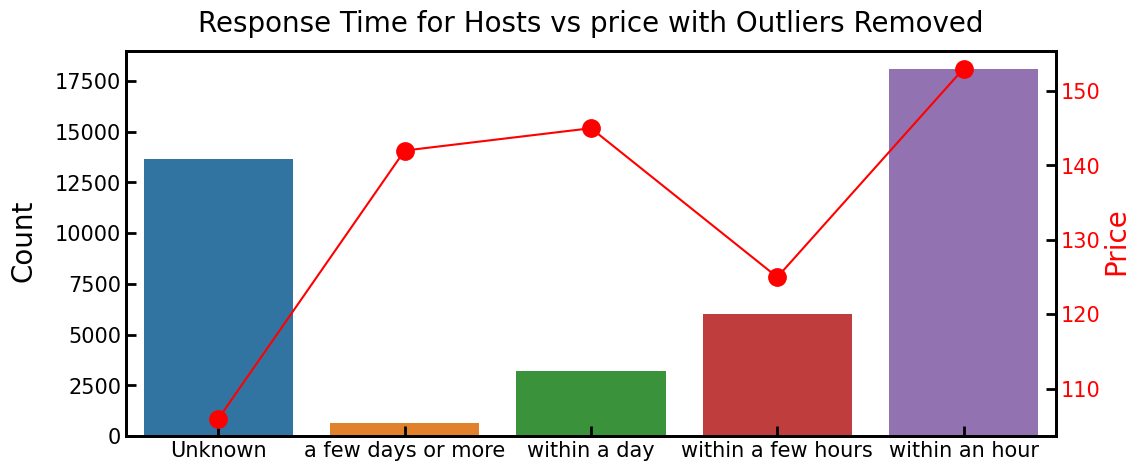

In [1242]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = price_vs_response_time['host_response_time'], y = price_vs_response_time['Count'], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(range(5), price_vs_response_time['price_outlier_removed'], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts vs price with Outliers Removed',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)


Now this provides useful analysis. After removing the outliers in the price column, we can clearly see that the hosts that respond within an hour for rental inquires have the highest average price. Unsuprisingly, the rentals whose hosts response is unrecorded have the lowest rental price among all other categories.

In [1243]:
df[df['host_response_time'] == 'Unknown'].shape[0] / df.shape[0]

0.3285339368694773

<b> Almost 33 % of the values in this column are `Unknown` which indicates that majority of hosts response time is not known. Similarly, this group of hosts have lowest rental price on average. So, we will use this column for modelling purpose.

In [1244]:
features_for_modelling.append('host_response_time')

## `host_response_rate` vs `Price`

In [1245]:
data_dictionary['host_response_rate']

'The percentage of messages that the Airbnb host responds to.'

In [1246]:
df['host_response_rate'].isnull().sum()

13645

In [1247]:
df['host_response_rate'].value_counts()

100    18953
99      1480
90      1152
80       733
98       718
       ...  
51         2
46         1
74         1
54         1
41         1
Name: host_response_rate, Length: 67, dtype: int64

<b> Lets remove % from the values first.

In [1248]:
df['host_response_rate'] = df['host_response_rate'].apply(lambda x : x[:-1] if x not in ['N/A', np.nan] else x )

<b> Lets replace N/A with null values

In [1249]:
df['host_response_rate'] = df['host_response_rate'].apply(lambda x : np.nan if x == 'N/A' else x)

<b> Lets replace "" values with null values

In [1250]:
df[df.host_response_rate == ''].shape

(381, 31)

In [1251]:
df['host_response_rate'] = df['host_response_rate'].apply(lambda x : np.nan if x == '' else x)

In [1218]:
df.host_response_rate.isnull().sum() / df.shape[0]

0.3285339368694773

There is no point in filling almost 33 % of null values. Lets do further analysis with price before deciding what to do with this column.

In [1219]:
temp = df[['host_response_rate', 'price', 'price_outlier_removed']].dropna()
temp.host_response_rate = temp.host_response_rate.astype(int)

KeyError: "['price_outlier_removed'] not in index"

<AxesSubplot: >

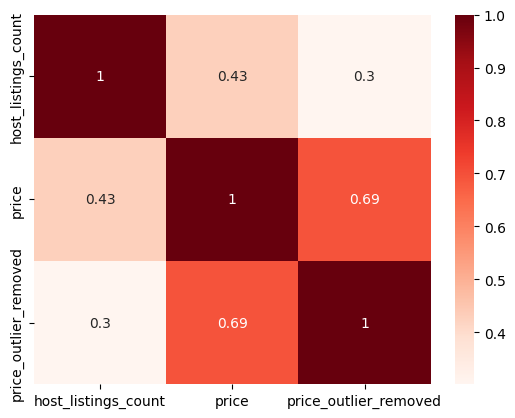

In [1220]:
sns.heatmap(temp.corr(), annot = True, cmap = 'Reds')

There seems to be no correlation between the price and host's response rate.

In [790]:
temp.groupby('host_response_rate')[['price', 'price_outlier_removed']].mean()

,price,price_outlier_removed
host_response_rate,,
1,194.285721,176.285714
2,236.442856,197.085714
3,243.379745,198.177215
4,154.557144,143.557143
5,575.372009,203.196429
6,200.666016,175.305019
7,481.237061,212.073456
8,224.186874,171.906899
9,232.559982,189.232116


<b> There seems to be no relationship between the price of a rental and it's host's percentage of responese to rental inquiries. So, we will drop this column.

In [795]:
df.drop('host_response_rate', axis = 1, inplace = True)

In [833]:
columns_that_are_dropped.append('host_response_rate')

## `host_acceptance_rate` vs `Price`

In [813]:
data_dictionary['host_acceptance_rate']

'The percentage of booking requests that the Airbnb host accepts.'

In [814]:
df['host_acceptance_rate'].value_counts()

100    9438
99     1796
97     1513
98     1383
0       946
       ... 
10        7
5         6
7         4
12        3
4         2
Name: host_acceptance_rate, Length: 98, dtype: int64

<b> Lets remove % from the values first.

In [815]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x : x[:-1] if x not in ['N/A', np.nan] else x )

<b> Lets replace N/A with null values

In [816]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x : np.nan if x == 'N/A' else x)

<b> Lets replace "" values with null values

In [817]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x : np.nan if x == '' else x)

In [818]:
df.host_acceptance_rate.isnull().sum() / df.shape[0]

0.3271615342017191

Almost 30 % of data in this columns are null values. Let's check if the host_acceptance rate truly impacts the price or not.

In [819]:
temp = df[['host_acceptance_rate', 'price', 'price_outlier_removed']].dropna()
temp.host_acceptance_rate = temp.host_acceptance_rate.astype(int)

<AxesSubplot: >

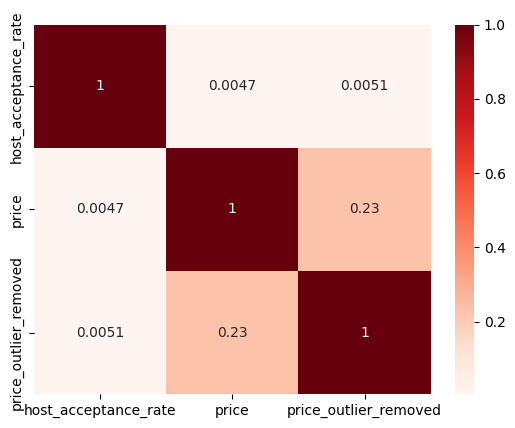

In [820]:
sns.heatmap(temp.corr(), annot = True, cmap = 'Reds')

<b> There does not seem to be much relationship between these two columns. So, we will proceed to drop this column.

In [821]:
temp = temp.groupby('host_acceptance_rate')[['price', 'price_outlier_removed']].mean().reset_index();temp

,host_acceptance_rate,price,price_outlier_removed
0,1,205.781021,175.486618
1,2,346.960358,227.042683
2,3,249.706207,202.461679
3,4,253.202301,179.903874
4,5,228.395004,189.528067
5,6,216.124283,174.801429
6,7,215.570236,172.616067
7,8,219.879288,160.122746
8,9,277.487335,191.277433
9,10,243.641663,185.746027


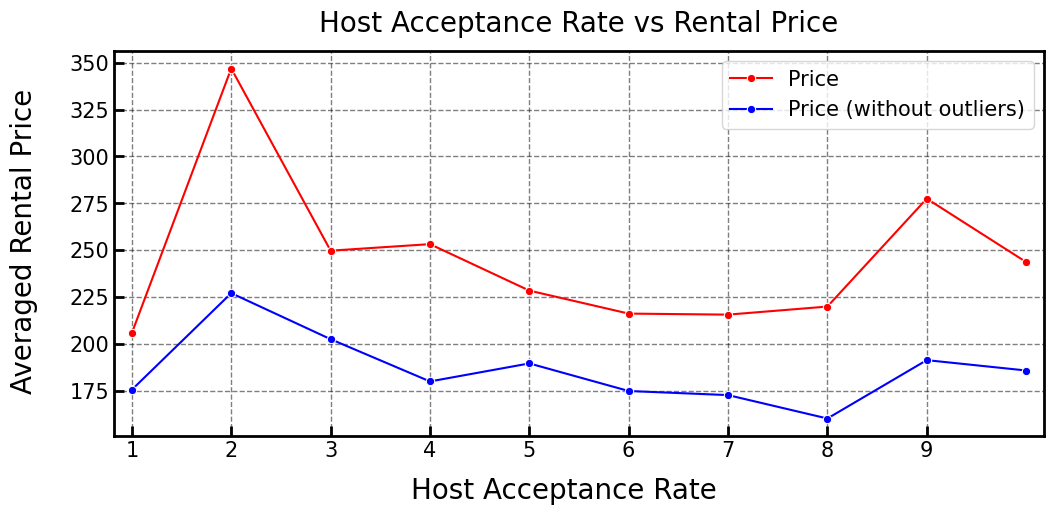

In [831]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.lineplot(x = temp['host_acceptance_rate'], y = temp['price'], ax  =ax, color = 'red', marker = 'o', label = 'Price')
bar = sns.lineplot(x = temp['host_acceptance_rate'], y = temp['price_outlier_removed'], ax  =ax, color = 'blue', marker = 'o', label = 'Price (without outliers)')

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Host Acceptance Rate vs Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Averaged Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host Acceptance Rate', ha='center', va='center', rotation='horizontal', fontsize = 20)
plt.xticks(range(1,10,1));


<b> Therefore we will proceed to drop this column.

In [832]:
df.drop('host_acceptance_rate', axis = 1, inplace = True)

In [834]:
columns_that_are_dropped.append('host_acceptance_rate')

## `host_is_superhost` vs `Price`

In [850]:
df['host_is_superhost'].value_counts() / df.shape[0] * 100

False    78.645896
True     21.354104
Name: host_is_superhost, dtype: float64

Almost 79 % of Airbnb rental hosts in NYC are not superhost. Could it be possible that superhosts will have higher rental price on average?

In [841]:
df.host_is_superhost.isnull().sum()

29

We will fill null values with `f` as this value is present in almost 78.6 % of values in this column. Lets check the relationship with price.

In [842]:
df.host_is_superhost.fillna('f', inplace = True)

In [843]:
df.host_is_superhost.isnull().sum()

0

<b> Changing f to False and t to True

In [849]:
df.host_is_superhost = df.host_is_superhost.apply(lambda x : True if x == 't' else False)

In [860]:
temp = df.groupby('host_is_superhost')[['price', 'price_outlier_removed']].agg({'price': ['mean', 'std', 'count']}).reset_index()
temp.columns = ['host_is_superhost', 'mean', 'std', 'count']

In [861]:
temp

,host_is_superhost,mean,std,count
0,False,225.306427,940.151915,32664
1,True,209.720932,839.015772,8869


Text(0.5, 0.0, 'Is host superhost?')

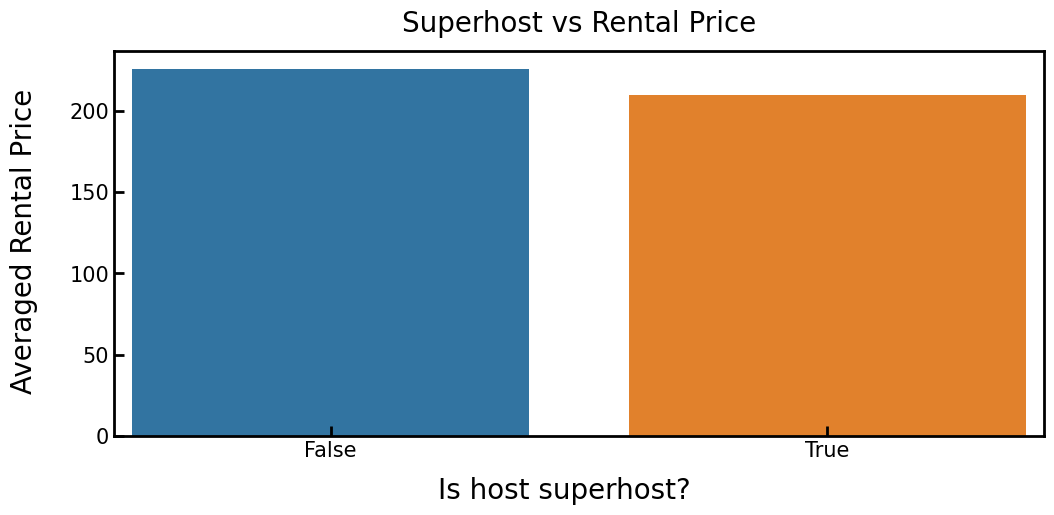

In [865]:

fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = 'host_is_superhost', y = 'mean', data = temp)

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Superhost vs Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

# plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
# ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Averaged Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Is host superhost?', ha='center', va='center', rotation='horizontal', fontsize = 20)

The results show that is a host is a superhost, it is less expensive on average. Since this analysis is inconclusive, we will drop this column. 

In [866]:
df.drop('host_is_superhost', axis = 1, inplace = True)
columns_that_are_dropped.append('host_is_superhost')

## `host_listings_count` vs `Price`

In [890]:
data_dictionary['host_listings_count']

'The number of listings that the Airbnb host has on the platform.'

In [798]:
# tempdf[['host_acceptance_rate', 'price', 'price_outlier_removed']]

In [892]:
df.host_listings_count.isnull().sum()

5

In [918]:
df.host_listings_count.unique()

array(['6', '1', '2', '4', '3', '7', '5', '11', '30', '10', '14', '20',
       '16', '8', '18', '22', '9', '19', '35', '173', '28', '12', '15',
       '31', '310', '23', '17', nan, '61', '71', '27', '465', '257', '32',
       '130', '39', '120', '37', '314', '45', '13', '38', '25', '265',
       '34', '24', '55', '26', '83', '564', '54', '4559', '347', '129',
       '57', '126', '232', '215', '154', '79', '21', '70', '42', '222',
       '1519', '29', '188', '52', '44', '180', '410', '102', '164', '53',
       '48', '84', '276', '101', '169', '136', '50', '46', '349', '40',
       '88', '715', '254', '200', '2648', '408', '205', '160', '228',
       '249', '187', '174', '1459', '47', '51', '77', '2250', '396',
       '280', '210', '248', '49', '159', '147', '242', '767', '139',
       '269', '574', '41', '225', '499', '91'], dtype=object)

In [911]:
temp = df[df.host_listings_count.isnull() == False][['host_listings_count', 'price', 'price_outlier_removed']]

In [914]:
temp.host_listings_count = temp.host_listings_count.astype(int)

In [915]:
temp.corr()

,host_listings_count,price,price_outlier_removed
host_listings_count,1.000000,0.055440,0.203877
price,0.055440,1.000000,0.260495
price_outlier_removed,0.203877,0.260495,1.000000


In [916]:
temp = temp.groupby('host_listings_count')[['price', 'price_outlier_removed']].mean().reset_index();temp

,host_listings_count,price,price_outlier_removed
0,1,196.087296,162.195239
1,2,186.891907,160.474199
2,3,216.310440,152.587929
3,4,166.436188,148.384937
4,5,247.405197,142.561905
...,...,...,...
111,1459,1570.000000,430.000000
112,1519,202.500000,202.500000
113,2250,1967.869263,430.000000
114,2648,1255.579956,424.580000


Text(0.5, 0.0, 'Host Listings Count')

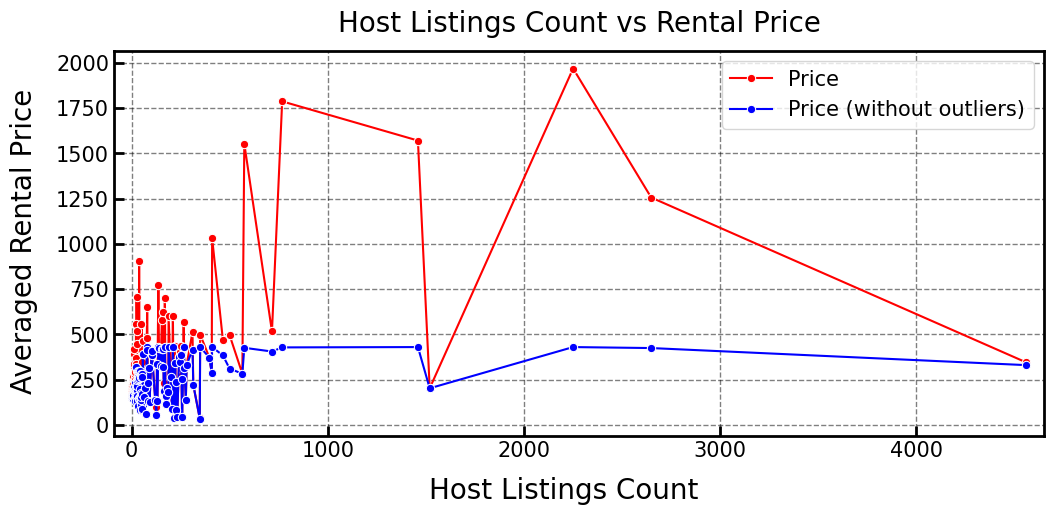

In [917]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.lineplot(x = temp['host_listings_count'], y = temp['price'], ax  =ax, color = 'red', marker = 'o', label = 'Price')
bar = sns.lineplot(x = temp['host_listings_count'], y = temp['price_outlier_removed'], ax  =ax, color = 'blue', marker = 'o', label = 'Price (without outliers)')

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Host Listings Count vs Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Averaged Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host Listings Count', ha='center', va='center', rotation='horizontal', fontsize = 20)
# plt.xticks(range(1,10,1));

In [899]:
df['host_listings_count'].describe()

count     41528
unique      116
top           1
freq      20037
Name: host_listings_count, dtype: object

In [896]:
df.host_listings_count.value_counts()

1      20037
2       5930
3       2883
4       1912
5       1155
       ...  
408        1
349        1
188        1
169        1
91         1
Name: host_listings_count, Length: 116, dtype: int64